<a href="https://colab.research.google.com/github/misha211/info/blob/master/miscarr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/AHS_Woman_21_Odisha.csv',delimiter="|")


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (118,147,178) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(15258, 201)

In [ ]:
df.head()

w_id    hl_id  client_w_id  ...  schedule_id  year         id
0  51371.0  79744.0        637.0  ...          2.0   2.0  6017185.0
1  51372.0  79745.0        638.0  ...          2.0   2.0  6017186.0
2  51373.0  79748.0        639.0  ...          2.0   2.0  6017187.0
3  51374.0  79749.0        640.0  ...          2.0   2.0  6017188.0
4  51375.0  79750.0        641.0  ...          2.0   2.0  6017189.0

[5 rows x 201 columns]

In [ ]:
df.shape

(15258, 201)

In [ ]:
to_drop= ["state","district","rural","stratum_code","ever_conceived","age_at_first_conception","is_husband_living_with_you",	"counselled_for_menstrual_hyg",	"aware_abt_danger_signs_new_born","housestatus","occupation","modern","traditional",
           "house_no","house_hold_no","year_of_intr","month_of_intr","date_of_intr","result_of_interview","other_int_code","serial_no","identifcation_code","marital_status","delivered_any_baby","born_alive_female","born_alive_male",	"born_alive_total",
           "surviving_female"	,"surviving_male",	"last_preg_no",	"previous_last_preg_no"	,"second_last_preg_no",	"third_last_preg_no",	"twsi_id"	,"client_twsi_id",	"currently_widow",	"is_tubectomy",	"is_vasectomy",	"is_copper_t",
           "is_pills_daily","w_expall_status","w_status",	"is_pills_daily",	"is_piils_weekly","is_emergency_contraceptive",	"is_condom","is_moder_methods","is_contraceptive","is_periodic_abstinence","is_withdrawal",	"is_amenorrahoea",	
           "is_other_traditional_method","pregnant_month","is_anc_registered",	"willing_to_get_pregnant","is_currently_menstruating","when_you_bcome_mother_last_time",	"is_any_fp_methos_used","fp_method_used","source_of_treatment_for_fp",	
           "how_long_using_this_method",	"method_obtain_last_time","reason_for_not_using_fp_method",
           "is_method_used_in_last_5_yrs","method_type_used_in_last_5_yrs","reason_for_discontinuation","intend_to_use_fp_method_in_futur", "when_method_is_going_to_use","which_method_going_to_pefer_for_","want_more_childern","next_child_preference",
           "aware_abt_ort_ors","aware_abt_ort_ors_zinc",	"new_born_alive_female",	"new_born_alive_male","new_born_alive_total",	"new_surviving_female",	"new_surviving_male",	"new_surviving_total",	"isdeadmigrated",	"residancial_status","iscoveredbyhealthscheme",	
           "healthscheme_1",	"healthscheme_2","householdstatus"	,"isheadchanged","headname",
           "time_for_next_child","anm_in_last_3_months","during_pregnancy","during_lactation","aware_abt_rti","aware_abt_hiv","aware_of_haf","twsi_expall_status","fid","hh_id",	"client_hh_id",	"currently_dead_or_out_migrated",	"hh_serial_no",	"sex",	"usual_residance",	
           "relation_to_head","member_identity",	"father_serial_no",	"mother_serial_no",	"date_of_birth","month_of_birth","year_of_birth",	"religion","social_group_code",	"date_of_marriage","month_of_marriage","year_of_marriage","currently_attending_school","reason_for_not_attending_school",
           "highest_qualification","land_possessed","hl_expall_status","sn",	"no_of_times_conceived",	"current_mar_status","is_injectable_contraceptive","months_of_preg_first_anc","compensation_after_ster","received_compensation_after_ster","received_compensation_ster_rs","health_prob_afters_fp_use",	
           "aware_abt_haf","ever_born","wt","fidx",	"as","as_binned","fidh","cdoi","edt","catage1","marital","anym"	,"respondentname",	"rtelephoneno",	"isnewrecord",	"recordupdatedcount",	"recordstatus","schedule_id",	"year",	"id",
           "hh_expall_status","house_structure","owner_status","w_id","hl_id","client_w_id","psu_id","building_no",	"house_status",	"drinking_water_source",	"is_water_filter",	"water_filteration",	"toilet_used"	,"is_toilet_shared"	,"household_have_electricity","lighting_source"	,"cooking_fuel",	
           "no_of_dwelling_rooms",	"kitchen_availability",	"is_radio","is_television",	"is_computer","is_telephone",	"is_washing_machine",	"is_refrigerator",	"is_sewing_machine",	"is_bicycle",	"is_scooter",	"is_car",	"is_tractor",
           	"is_water_pump",	"cart","client_hl_id","status"]

In [ ]:
df.drop(to_drop, axis=1,inplace=True)
#here droping the whole variable to_drop by this method

In [ ]:
df.head()


age  surviving_total  mother_age_when_baby_was_born  ...  chew  smoke  alcohol
0   25              2.0                           20.0  ...   7.0    4.0      4.0
1   31              2.0                           23.0  ...   7.0    4.0      4.0
2   35              2.0                           24.0  ...   7.0    4.0      4.0
3   49              5.0                           17.0  ...   5.0    4.0      4.0
4   46              1.0                           19.0  ...   7.0    4.0      4.0

[5 rows x 20 columns]

In [ ]:
df.shape

(7652, 20)

In [ ]:
df.isnull()

age  surviving_total  ...  smoke  alcohol
0      False            False  ...  False    False
1      False            False  ...  False    False
2      False            False  ...  False    False
3      False            False  ...  False    False
4      False            False  ...  False    False
...      ...              ...  ...    ...      ...
25313  False            False  ...  False    False
25314  False            False  ...  False    False
25315  False            False  ...  False    False
25316  False             True  ...  False    False
25317  False            False  ...  False    False

[25318 rows x 20 columns]

In [ ]:
df.columns

Index(['age', 'surviving_total', 'mother_age_when_baby_was_born',
       'outcome_pregnancy', 'is_currently_pregnant',
       'aware_of_the_danger_signs', 'occupation_status', 'disability_status',
       'injury_treatment_type', 'illness_type', 'treatment_source',
       'symptoms_pertaining_illness', 'sought_medical_care', 'diagnosed_for',
       'diagnosis_source', 'regular_treatment', 'regular_treatment_source',
       'chew', 'smoke', 'alcohol'],
      dtype='object')

In [ ]:
df1["outcome_pregnancy"].describe()

count    5078.000000
mean        1.659512
std         0.638884
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: outcome_pregnancy, dtype: float64

In [ ]:
df1["outcome_pregnancy"].unique()

array([1, 2, 0])

In [ ]:
#IX.	Exploratory Data Analysis

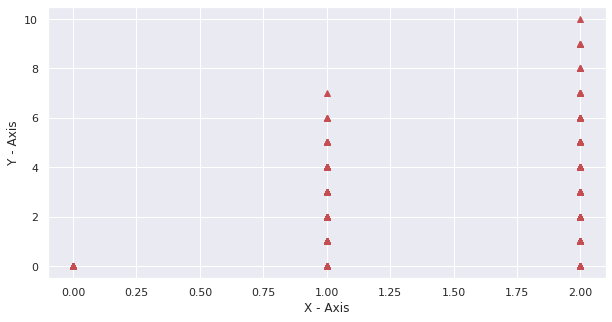

In [ ]:
# Plotting traingular dots using the argument "r^"
plt.figure(figsize=(10,5))
x = df1["outcome_pregnancy"]         
y =  df1["surviving_total"]  # Sine Graph
plt.plot(x,y,'r^')
plt.xlabel("X - Axis")
plt.ylabel("Y - Axis")
plt.show()

In [ ]:
df1.drop(["occupation_status","treatment_source","diagnosis_source"],axis=1,inplace=True)

In [ ]:
df1.drop(["0","injury_treatment_type","illness_type"],axis=1,inplace=True)

In [ ]:
df1.drop(["status","client_hl_id"],axis=1,inplace=True)

[]

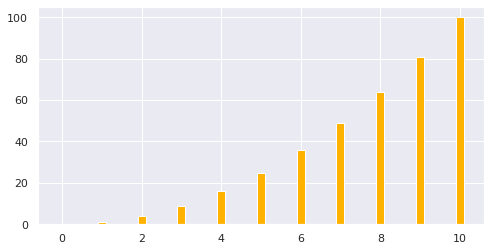

In [ ]:
x = df1["outcome_pregnancy"]         
y =  df1["surviving_total"] 
plt.figure(figsize=(8,4))
plt.bar(x, x**2, width=0.2 , color = '#FF6F00')
plt.bar(y, y**2, width=0.2 , color = '#FFB300')
plt.plot()

In [ ]:
df1.describe()

age  surviving_total  ...        smoke      alcohol
count  5078.000000      5078.000000  ...  5078.000000  5078.000000
mean     34.115597         2.040370  ...     3.527373     3.484443
std       8.422130         1.452737  ...     1.284266     1.303491
min      15.000000         0.000000  ...     0.000000     0.000000
25%      27.000000         1.000000  ...     4.000000     4.000000
50%      34.000000         2.000000  ...     4.000000     4.000000
75%      41.000000         3.000000  ...     4.000000     4.000000
max      49.000000        10.000000  ...     4.000000     4.000000

[8 rows x 15 columns]

In [ ]:
df.mean().sum()

139.96355393610185

In [ ]:
df1.corr()

age  surviving_total  ...     smoke   alcohol
age                            1.000000         0.470482  ...  0.198372  0.181617
surviving_total                0.470482         1.000000  ...  0.181573  0.156095
mother_age_when_baby_was_born  0.215131         0.492143  ...  0.147217  0.145017
outcome_pregnancy              0.262312         0.427366  ...  0.134151  0.126679
is_currently_pregnant         -0.030155         0.350670  ...  0.054655  0.063799
aware_of_the_danger_signs      0.006057         0.300087  ...  0.181841  0.166928
disability_status              0.037404        -0.007828  ... -0.009677 -0.010402
symptoms_pertaining_illness   -0.179624        -0.166604  ... -0.328590 -0.299566
sought_medical_care            0.176008         0.067193  ... -0.050258 -0.036045
diagnosed_for                  0.091051         0.027711  ... -0.055933 -0.043704
regular_treatment              0.165902         0.057408  ... -0.028756 -0.015856
regular_treatment_source       0.071662         0.034617  ... -0.001466 -0.001666
chew                           0.010098         0.073163  ...  0.741078  0.728433
smoke                          0.198372         0.181573  ...  1.000000  0.956303
alcohol                        0.181617         0.156095  ...  0.956303  1.000000

[15 rows x 15 columns]

In [ ]:
df1.count().sum()

116794

In [ ]:
df1.count()


age                              5078
surviving_total                  5078
mother_age_when_baby_was_born    5078
outcome_pregnancy                5078
is_currently_pregnant            5078
aware_of_the_danger_signs        5078
disability_status                5078
symptoms_pertaining_illness      5078
sought_medical_care              5078
diagnosed_for                    5078
regular_treatment                5078
regular_treatment_source         5078
chew                             5078
smoke                            5078
alcohol                          5078
dtype: int64

In [ ]:
df.to_csv("file1.csv") #extracting the file into csv format

NameError: ignored

In [ ]:
df1.max()

age                              49
surviving_total                  10
mother_age_when_baby_was_born    40
outcome_pregnancy                 2
is_currently_pregnant             2
aware_of_the_danger_signs         2
disability_status                 5
symptoms_pertaining_illness      99
sought_medical_care               3
diagnosed_for                    99
regular_treatment                 3
regular_treatment_source         99
chew                              7
smoke                             4
alcohol                           4
dtype: int64

In [ ]:
df1=pd.read_csv("/content/file1 (1).csv")
df1.columns

Index(['0', 'age', 'surviving_total', 'mother_age_when_baby_was_born',
       'outcome_pregnancy', 'is_currently_pregnant',
       'aware_of_the_danger_signs', 'occupation_status', 'disability_status',
       'injury_treatment_type', 'illness_type', 'treatment_source',
       'symptoms_pertaining_illness', 'sought_medical_care', 'diagnosed_for',
       'diagnosis_source', 'regular_treatment', 'regular_treatment_source',
       'chew', 'smoke', 'alcohol', 'status', 'client_hl_id'],
      dtype='object')

In [ ]:
plt.bar(is_currently_pregnant,outcome_pregnancy)
plt.xlabel('is_currently_pregnant')
plt.ylabel('outcome_pregnancy')
plt.show()

NameError: ignored

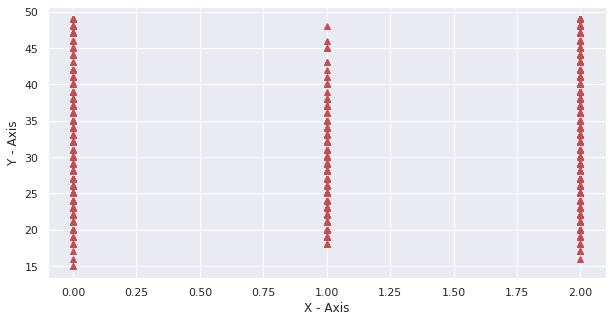

In [ ]:
# Plotting traingular dots using the argument "r^"
plt.figure(figsize=(10,5))
x = df1["outcome_pregnancy"]         
y =  df1["age"]  # Sine Graph
plt.plot(x,y,'r^')
plt.xlabel("X - Axis")
plt.ylabel("Y - Axis")
plt.show()

In [ ]:
df1.isnull()

0    age  surviving_total  ...  alcohol  status  client_hl_id
0     False  False            False  ...    False   False         False
1     False  False            False  ...    False   False         False
2     False  False            False  ...    False   False         False
3     False  False            False  ...    False   False         False
4     False  False            False  ...    False   False         False
...     ...    ...              ...  ...      ...     ...           ...
5073  False  False            False  ...    False   False         False
5074  False  False            False  ...    False   False         False
5075  False  False            False  ...    False   False         False
5076  False  False            False  ...    False   False         False
5077  False  False            False  ...    False   False         False

[5078 rows x 23 columns]

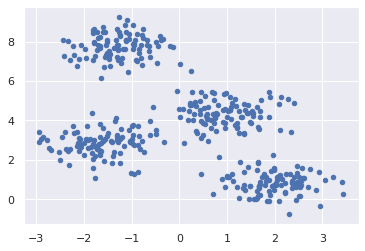

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

In [ ]:
#supervised learing algorithmns

In [ ]:
df1.columns

Index(['0', 'age', 'surviving_total', 'mother_age_when_baby_was_born',
       'outcome_pregnancy', 'is_currently_pregnant',
       'aware_of_the_danger_signs', 'occupation_status', 'disability_status',
       'injury_treatment_type', 'illness_type', 'treatment_source',
       'symptoms_pertaining_illness', 'sought_medical_care', 'diagnosed_for',
       'diagnosis_source', 'regular_treatment', 'regular_treatment_source',
       'chew', 'smoke', 'alcohol', 'status', 'client_hl_id'],
      dtype='object')

In [ ]:
feature_col=['age', 'aware_of_the_danger_signs', 'diagnosed_for',  'chew', 'smoke',
             'alcohol','is_currently_pregnant']
X = df1[feature_col] # Features
y = df1.outcome_pregnancy # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#fitting the model
logreg=LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn import metrics
from sklearn import preprocessing
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[ 74   1  40]
 [  1  42 145]
 [ 37  39 891]]


Text(0.5, 257.44, 'Predicted label')

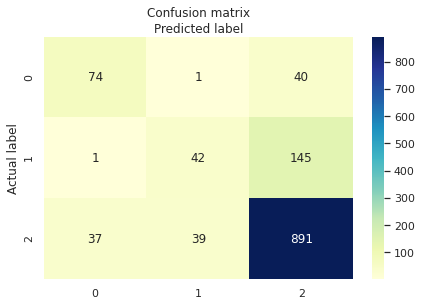

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7929133858267716


In [ ]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[ 83   0  32]
 [  1   0 187]
 [ 58   0 909]]


In [ ]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.metrics import confusion_matrix
tm = confusion_matrix(y_test, Y_pred)
print(cm)

[[ 83   0  32]
 [  1   0 187]
 [ 58   0 909]]


In [ ]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[ 83   0  32]
 [  1   0 187]
 [ 58   0 909]]


In [ ]:
############# Decision tree #######################

In [ ]:
feature_col=['age',  'chew', 'smoke',
             'alcohol','is_currently_pregnant']
X = df1[feature_col] # Features
y = df1.outcome_pregnancy # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7677165354330708


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_col,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('miscarriage.png')
Image(graph.create_png())

In [ ]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn import metrics
from sklearn import preprocessing
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7677165354330708


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7775590551181102
ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [ ]:
#Accuracy
Logistic Regression        79%
Decision tree algorithm    76%
Gaussian Classifier        77%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=df1.feature_col).sort_values(ascending=False)
feature_imp

In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
Y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[ 76,   1,  38],
       [  1,  41, 146],
       [ 43,  36, 888]])

In [ ]:
#Multinomial Logistic Regression
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Create one-vs-rest logistic regression object
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [ ]:
# Train model
model = clf.fit(X_std, y)


In [ ]:
# Create new observation
new_observation = [[.5, .5, .5, .5]]


In [ ]:
# Predict class
model.predict(new_observation)

In [ ]:
#Using XGBoost 
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
df1_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[13:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.702574


In [ ]:
#k-fold Cross Validation using XGBoost
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=df1_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[14:01:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:01:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:01:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.head()
print((cv_results["test-rmse-mean"]).tail(1))

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         1.215701        0.005097        1.215720       0.012867
1         1.120779        0.001765        1.121369       0.016299
2         1.042340        0.001747        1.042697       0.015261
3         0.971610        0.005587        0.971600       0.016521
4         0.908095        0.005654        0.907709       0.013515

49    0.510858
Name: test-rmse-mean, dtype: float64


In [ ]:
#Visualize Boosting Trees and Feature Importance
xg_reg = xgb.train(params=params, dtrain=df1_dmatrix, num_boost_round=10)

[14:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


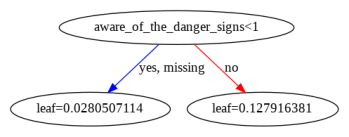

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

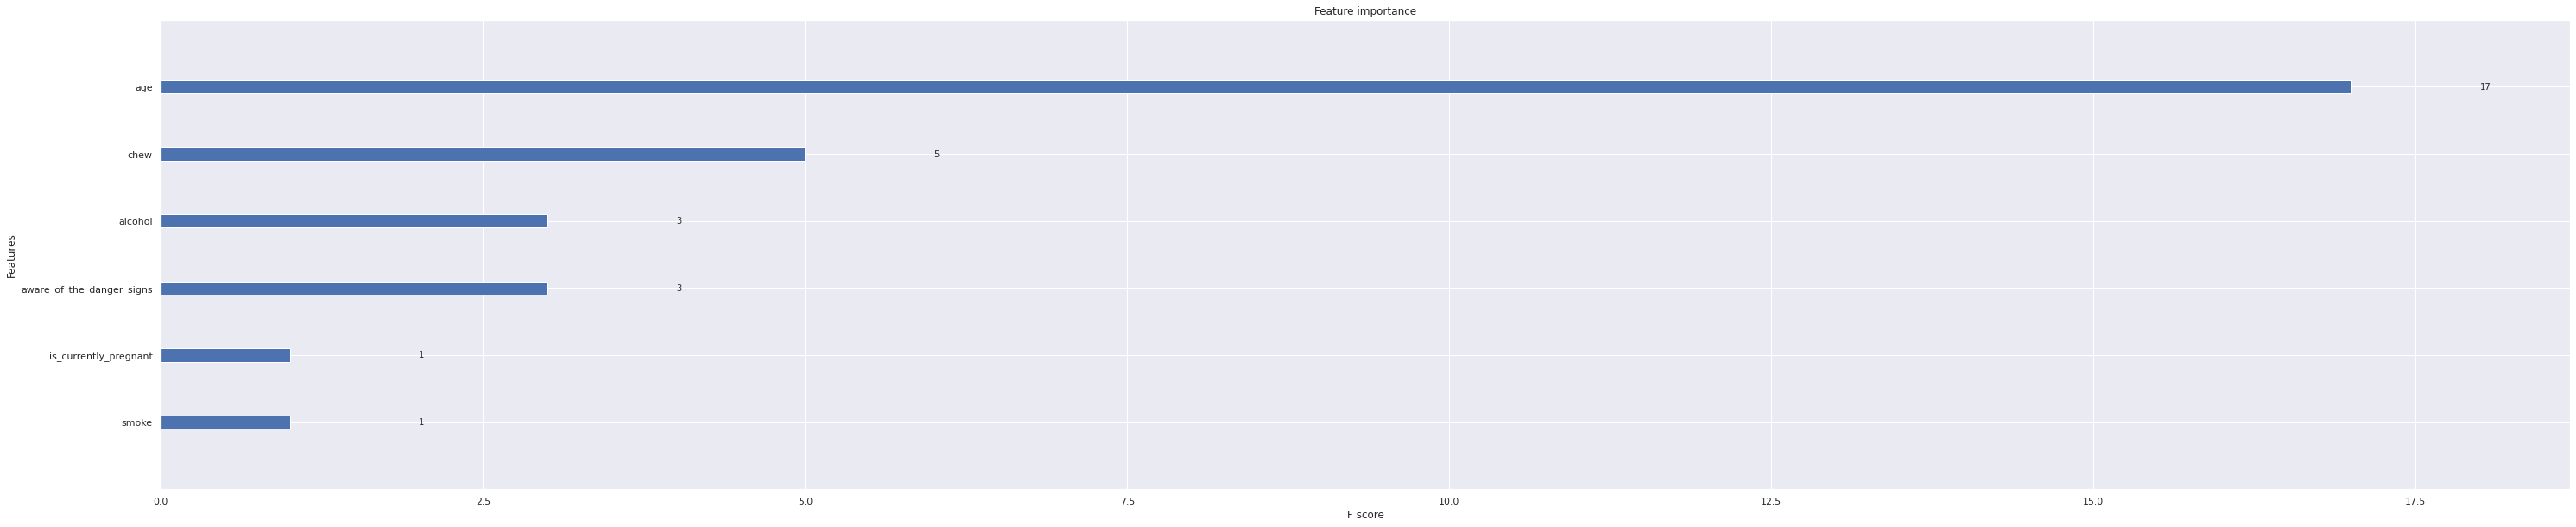

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()